In [1]:
# !pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
# import sklearn as sk
from matplotlib import pyplot as plt
import seaborn as sn
import seaborn as sns
from matplotlib import pyplot
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

# Creating the modeling dataset
# from sklearn.datasets import make_classification
# Data processing

# Model and performance
#from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report

# Oversampling and under sampling
# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.under_sampling import RandomUnderSampler, NearMiss
# from collections import Counter
%matplotlib inline


In [3]:

# Load and preprocess the data
# data = pd.read_csv("startup_funding.csv")
# X = data.iloc[:, 0:10].values
# y = data.iloc[:, 10:].values

# Define the neural network architecture
# model = Sequential()
# model.add(Dense(64, input_dim=10, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(8, activation='softmax'))

# Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

# Generate predictions for a new startup
# new_startup = np.array([[1000000, 0, 1, 0, 0, 0, 1, 0, 0, 0]])
# predictions = model.predict(new_startup)

# Select the output nodes with the highest activation levels
# investors = np.argsort(predictions)[0][-15:]

In [4]:
# Load and preprocess the data
# data = pd.read_csv("startup_funding.csv")
# X = data.iloc[:, 0:10].values
# investor_names = data.columns[10:].tolist()
# y = data.iloc[:, 10:].values

# Define the neural network architecture
# model = Sequential()
# model.add(Dense(64, input_dim=10, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(len(investor_names), activation='softmax'))

# Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

# Generate predictions for a new startup
# new_startup = np.array([[1000000, 0, 1, 0, 0, 0, 1, 0, 0, 0]])
# predictions = model.predict(new_startup)

# Map the numeric output to investor names
# investor_probs = {name: prob for name, prob in zip(investor_names, predictions[0])}
# top_investors = sorted(investor_probs, key=investor_probs.get, reverse=True)[:15]


In [5]:
df_deals = pd.read_excel ('data/Deals (investment).xlsx')
df_deals.head()

,1_post_date,2_post_title,3_amount,4_Stake,5_funding_round,6_investors,7_source,Country/Town,Country(HQ),Category,...,Investor 6.1,Investor 7.1,Investor 8.1,Investor 9.1,Investor 10.1,Investor 11.1,Investor 12.1,Investor 13.1,Investor 14.1,Investor 15.1
0,2008-09-01,biNu,600000,NaN,Seed,Artesian VC,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-11-01,biNu,400000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,Australia,Australia,Mobile Internet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-12-03,AllLife,6000000,NaN,Private Equity,LeapFrog Investments,http://www.prnewswire.co.uk/news-releases/leap...,South Africa,South Africa,"Insurance, InsurTech",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-12-11,Bridge International Academies,1800000,NaN,Grant,Omidyar Network,http://foundationcenter.org/pnd/news/story.jht...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-04-01,biNu,320000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cols = df_deals.columns

In [7]:
for cat_col in cols:
    print(f"{cat_col}: {df_deals[cat_col].nunique()} uniqueness variable")

1_post_date: 695 uniqueness variable
2_post_title: 800 uniqueness variable
3_amount: 281 uniqueness variable
4_Stake: 7 uniqueness variable
5_funding_round: 27 uniqueness variable
6_investors: 717 uniqueness variable
7_source: 1070 uniqueness variable
Country/Town: 34 uniqueness variable
Country(HQ): 34 uniqueness variable
Category: 660 uniqueness variable
main_sector: 48 uniqueness variable
Check vs Companies: 727 uniqueness variable
Deals Information, Level of Completeness: 6 uniqueness variable
duplicated_conc: 1120 uniqueness variable
Duplication: 1 uniqueness variable
Disclosed : 2 uniqueness variable
Founded: 23 uniqueness variable
Total  Disclosed Funding: 280 uniqueness variable
DA Classification_African Company (Yes = 0; No = 1): 2 uniqueness variable
funding round, DA: 8 uniqueness variable
Industry, DA: 13 uniqueness variable
Year: 14 uniqueness variable
Month: 12 uniqueness variable
Quarter: 4 uniqueness variable
Half: 2 uniqueness variable
Number of Investors: 12 uniquenes

In [8]:
df_deals.shape

(2059, 59)

In [9]:
# df_deals['Investor 2'].unique()

In [10]:
df_deals.columns

Index(['1_post_date', '2_post_title', '3_amount', '4_Stake', '5_funding_round',
       '6_investors', '7_source', 'Country/Town', 'Country(HQ)', 'Category',
       'main_sector', 'Check vs Companies',
       'Deals Information, Level of Completeness', 'duplicated_conc',
       'Duplication', 'Disclosed ', 'Founded', 'Total  Disclosed Funding',
       'DA Classification_African Company (Yes = 0; No = 1)',
       'funding round, DA', 'Industry, DA', 'Year', 'Month', 'Quarter', 'Half',
       'Number of Investors', 'Investor 1', 'Investor 2', 'Investor 3',
       'Investor 4', 'Investor 5', 'Investor 6', 'Investor 7', 'Investor 8',
       'Investor 9', 'Investor 10', 'Investor 11', 'Investor 12',
       'Investor 13', 'Investor 14', 'Investor 15',
       'Cummulative Deals (Disclosed)', 'Cummulative Deals (Undisclosed)',
       'Cummulative Amount', 'Investor 1.1', 'Investor 2.1', 'Investor 3.1',
       'Investor 4.1', 'Investor 5.1', 'Investor 6.1', 'Investor 7.1',
       'Investor 8.1',

In [11]:
df_deals = df_deals.drop(['Investor 1','Cummulative Deals (Disclosed)','Cummulative Deals (Undisclosed)','Cummulative Amount','7_source','4_Stake','Investor 2', 'Investor 3',
       'Investor 4', 'Investor 5', 'Investor 6', 'Investor 7', 'Investor 8',
       'Investor 9', 'Investor 10', 'Investor 11', 'Investor 12','Investor 13','Investor 14','Investor 13.1','Investor 14.1','Investor 15.1','Investor 15','Duplication','Investor 1.1',
       'Investor 2.1', 'Investor 3.1', 'Investor 4.1', 'Investor 5.1',
       'Investor 6.1', 'Investor 7.1', 'Investor 8.1', 'Investor 9.1',
       'Investor 10.1', 'Investor 11.1', 'Investor 12.1'], axis=1)

In [12]:
df_deals.head()

,1_post_date,2_post_title,3_amount,5_funding_round,6_investors,Country/Town,Country(HQ),Category,main_sector,Check vs Companies,...,Founded,Total Disclosed Funding,DA Classification_African Company (Yes = 0; No = 1),"funding round, DA","Industry, DA",Year,Month,Quarter,Half,Number of Investors
0,2008-09-01,biNu,600000,Seed,Artesian VC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2008.0,9.0,3.0,2.0,1.0
1,2008-11-01,biNu,400000,Angel,Undisclosed,Australia,Australia,Mobile Internet,Information Technology,biNu,...,2008.0,14220000.0,1.0,2. Seed,Other Technologies & Information Technology,2008.0,11.0,4.0,2.0,1.0
2,2009-12-03,AllLife,6000000,Private Equity,LeapFrog Investments,South Africa,South Africa,"Insurance, InsurTech",Financial Services,AllLife,...,2004.0,12700000.0,0.0,6. Private Equity,Financial Services,2009.0,12.0,4.0,2.0,1.0
3,2009-12-11,Bridge International Academies,1800000,Grant,Omidyar Network,NaN,NaN,NaN,NaN,NaN,...,NaN,27800000.0,NaN,1. Grant,NaN,2009.0,12.0,4.0,2.0,1.0
4,2010-04-01,biNu,320000,Angel,Undisclosed,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2010.0,4.0,2.0,1.0,1.0


In [13]:
df_deals["DA Classification_African Company (Yes = 0; No = 1)"].value_counts()

0.0    1060
1.0      20
Name: DA Classification_African Company (Yes = 0; No = 1), dtype: int64

In [14]:
df_deals = df_deals.dropna()

In [15]:
# df_deals.head()

In [16]:
df_deals.shape

(967, 23)

In [17]:
def get_year(dt):
    return dt.year

df_deals['year'] = df_deals['1_post_date'].map(get_year)
#df_deals

In [18]:
# df_deals

In [19]:
df_deals = df_deals.drop(['Year','year','Country/Town'], axis=1)

In [20]:
# df_deals

In [21]:
#Dropping columns that the startup wont have prior
df_deals = df_deals.drop(['1_post_date','2_post_title','Check vs Companies','Industry, DA'], axis=1)

In [22]:
# df_deals

In [23]:
df_deals = df_deals.drop(['duplicated_conc'], axis=1)

In [24]:
df_deals['5_funding_round'].unique()

array(['Seed', 'Grant', 'Series A', 'Angel', 'Debt Financing', 'Series B',
       'Series D', 'Series C', 'Private Equity', 'Pre-Series B',
       'Convertible Note', 'Pre-Seed', 'Venture Round', 'Series E',
       'Undisclosed', 'Crowdfunding', 'Corporate Venture',
       'Corporate Round', 'Series A II', 'CrowdFunding'], dtype=object)

In [25]:
# !pip install category_encoders

In [26]:
from category_encoders import OrdinalEncoder

In [27]:
# df_deals['main_sector'].unique()

In [28]:
df_deals['main_sector'] = df_deals['main_sector'].apply(lambda x: x.lower())
df_deals['main_sector'].unique()

array(['financial services', 'recruitment', 'education',
       'media & entertainment', 'e-commerce & retail',
       'information technology', 'real estate',
       'commercial & professional services', 'software',
       'transport & logistics', 'automotive', 'healthcare & pharma',
       'utilities and telecommunication services', 'agriculture',
       'travel & leisure', 'social network', 'security',
       'renewables & environment', 'emerging technologies',
       'recruitment, human resource', 'saas', 'marketing',
       'resource & energy', 'renewable energy',
       'real estate and construction', 'robotics',
       'other technologies & information technology',
       'telecommunications', 'solar power', 'media/ entertainment',
       'solar energy, energy and resources', 'media and entertainment',
       'travel and leisure'], dtype=object)

In [29]:
def main_sector(sector):
    if 'recruitment' in sector.lower():
        return 'recruitment, human resource'
    elif 'media/ entertainment' in sector.lower():
        return 'media and entertainment'
    elif 'media & entertainment' in sector.lower():
        return 'media and entertainment'
    elif 'solar power' in sector.lower():
        return 'solar energy, energy and resources'
    elif 'real estate' in sector.lower():
        return 'real estate and construction'
    elif 'resource & energy' in sector.lower():
        return 'solar energy, energy and resources'
    elif 'telecommunications' in sector.lower():
        return 'utilities and telecommunication services'
    elif 'renewable energy' in sector.lower():
        return 'renewables & environment'
    elif 'information technology' in sector.lower():
        return 'other technologies & information technology'
    else:
        return sector

In [30]:
#applying our function to eliminate duplicates
df_deals['main_sector'] = df_deals['main_sector'].apply(main_sector)

In [31]:
df_deals['main_sector'].unique()

array(['financial services', 'recruitment, human resource', 'education',
       'media and entertainment', 'e-commerce & retail',
       'other technologies & information technology',
       'real estate and construction',
       'commercial & professional services', 'software',
       'transport & logistics', 'automotive', 'healthcare & pharma',
       'utilities and telecommunication services', 'agriculture',
       'travel & leisure', 'social network', 'security',
       'renewables & environment', 'emerging technologies', 'saas',
       'marketing', 'solar energy, energy and resources', 'robotics',
       'travel and leisure'], dtype=object)

In [32]:
# mapping_ms = [{'col': 'main_sector', 'mapping': {'financial services': 1, 'recruitment, human resource': 2, 'education': 3,
#        'media and entertainment': 4, 'e-commerce & retail': 5,
#        'other technologies & information technology': 6,
#        'real estate and construction': 7,
#        'commercial & professional services': 8, 'software': 9,
#        'transport & logistics': 10, 'automotive': 11, 'healthcare & pharma': 12,
#        'utilities and telecommunication services': 13, 'agriculture': 14,
#        'travel & leisure': 15, 'social network': 16, 'security': 17,
#        'renewables & environment': 18, 'emerging technologies': 19, 'saas': 20,
#        'marketing': 21, 'solar energy, energy and resources': 22, 'robotics': 23,
#        'travel and leisure': 24}}]
# OrdinalEncoder(cols=['main_sector'], mapping=mapping_ms).fit(df_deals).transform(df_deals)

mapping_ms = {'financial services': 1, 'recruitment, human resource': 2, 'education': 3,
       'media and entertainment': 4, 'e-commerce & retail': 5,
       'other technologies & information technology': 6,
       'real estate and construction': 7,
       'commercial & professional services': 8, 'software': 9,
       'transport & logistics': 10, 'automotive': 11, 'healthcare & pharma': 12,
       'utilities and telecommunication services': 13, 'agriculture': 14,
       'travel & leisure': 15, 'social network': 16, 'security': 17,
       'renewables & environment': 18, 'emerging technologies': 19, 'saas': 20,
       'marketing': 21, 'solar energy, energy and resources': 22, 'robotics': 23,
       'travel and leisure': 24}

df_deals['main_sector_encoded'] = df_deals['main_sector'].apply(lambda x: mapping_ms[x])

In [33]:
# df_deals.head()

In [34]:
# mapping_sr = [{'col': '5_funding_round', 'mapping': {'Seed': 1, 'Grant': 2, 'Series A': 3, 'Angel': 4, 'Debt Financing': 5, 'Series B': 6,
#        'Series D': 7, 'Series C': 8, 'Private Equity': 9, 'Pre-Series B': 10,
#        'Convertible Note': 11, 'Pre-Seed': 12, 'Venture Round': 13, 'Series E': 14,
#        'Undisclosed': 15, 'Crowdfunding': 16, 'Corporate Venture': 17,
#        'Corporate Round': 18, 'Series A II': 19, 'CrowdFunding': 20}}]
# OrdinalEncoder(cols=['5_funding_round'], mapping=mapping_sr).fit(df_deals).transform(df_deals)


In [35]:
mapping_sr = {'Seed': 1, 'Grant': 2, 'Series A': 3, 'Angel': 4, 'Debt Financing': 5, 'Series B': 6,
       'Series D': 7, 'Series C': 8, 'Private Equity': 9, 'Pre-Series B': 10,
       'Convertible Note': 11, 'Pre-Seed': 12, 'Venture Round': 13, 'Series E': 14,
       'Undisclosed': 15, 'Crowdfunding': 16, 'Corporate Venture': 17,
       'Corporate Round': 18, 'Series A II': 19, 'CrowdFunding': 20}

df_deals['funding_round_encoded'] = df_deals['5_funding_round'].apply(lambda x: mapping_sr[x])

In [36]:
df_deals.head()

,3_amount,5_funding_round,6_investors,Country(HQ),Category,main_sector,"Deals Information, Level of Completeness",Disclosed,Founded,Total Disclosed Funding,DA Classification_African Company (Yes = 0; No = 1),"funding round, DA",Month,Quarter,Half,Number of Investors,main_sector_encoded,funding_round_encoded
5,75000,Seed,First Light Ventures,Kenya,"Enterprise Software, Financial Services, Infor...",financial services,0.9,1.0,2011.0,6504900.0,0.0,2. Seed,8.0,3.0,2.0,1.0,1,1
6,700000,Seed,Tim Draper,Nigeria,"Money Transfer, Airtime, Bill Payments, and SM...",financial services,0.9,1.0,2009.0,32700000.0,0.0,2. Seed,9.0,3.0,2.0,1.0,1,1
7,150000,Grant,Undisclosed,Egypt,"Information Services, Information Technology, ...","recruitment, human resource",0.9,1.0,2009.0,7850000.0,0.0,1. Grant,12.0,4.0,2.0,1.0,2,2
8,1500000,Grant,Omidyar Network,South Africa,"E-Learning, Education, Tutoring",education,0.9,1.0,2008.0,55800000.0,0.0,1. Grant,5.0,2.0,1.0,1.0,3,2
10,1500000,Series A,TBL Mirror Fund,Kenya,"Mobile Payments, Digital Payments, eCommerce, ...",financial services,0.9,1.0,2004.0,54500000.0,0.0,3. Early Venture,10.0,4.0,2.0,1.0,1,3


In [37]:
# df_deals['Category'].unique()

In [38]:
df_deals.head()

,3_amount,5_funding_round,6_investors,Country(HQ),Category,main_sector,"Deals Information, Level of Completeness",Disclosed,Founded,Total Disclosed Funding,DA Classification_African Company (Yes = 0; No = 1),"funding round, DA",Month,Quarter,Half,Number of Investors,main_sector_encoded,funding_round_encoded
5,75000,Seed,First Light Ventures,Kenya,"Enterprise Software, Financial Services, Infor...",financial services,0.9,1.0,2011.0,6504900.0,0.0,2. Seed,8.0,3.0,2.0,1.0,1,1
6,700000,Seed,Tim Draper,Nigeria,"Money Transfer, Airtime, Bill Payments, and SM...",financial services,0.9,1.0,2009.0,32700000.0,0.0,2. Seed,9.0,3.0,2.0,1.0,1,1
7,150000,Grant,Undisclosed,Egypt,"Information Services, Information Technology, ...","recruitment, human resource",0.9,1.0,2009.0,7850000.0,0.0,1. Grant,12.0,4.0,2.0,1.0,2,2
8,1500000,Grant,Omidyar Network,South Africa,"E-Learning, Education, Tutoring",education,0.9,1.0,2008.0,55800000.0,0.0,1. Grant,5.0,2.0,1.0,1.0,3,2
10,1500000,Series A,TBL Mirror Fund,Kenya,"Mobile Payments, Digital Payments, eCommerce, ...",financial services,0.9,1.0,2004.0,54500000.0,0.0,3. Early Venture,10.0,4.0,2.0,1.0,1,3


In [39]:
# Load and preprocess the data
data = df_deals
X = data.iloc[:, 0:2].values
investor_names = data.columns[10:].tolist()
y = data.iloc[:, 2:].values

In [40]:
data = data.rename(columns={' Disclosed': "Disclosed"})

In [41]:
mode_value = data['6_investors'].mode()[0]


In [42]:
# data['6_investors'].fillna(mode_value, inplace=True)
# data['6_investors'] = data['6_investors'].replace('Undisclosed', mode_value, inplace=True)

data


,3_amount,5_funding_round,6_investors,Country(HQ),Category,main_sector,"Deals Information, Level of Completeness",Disclosed,Founded,Total Disclosed Funding,DA Classification_African Company (Yes = 0; No = 1),"funding round, DA",Month,Quarter,Half,Number of Investors,main_sector_encoded,funding_round_encoded
5,75000,Seed,First Light Ventures,Kenya,"Enterprise Software, Financial Services, Infor...",financial services,0.9,1.0,2011.0,6504900.0,0.0,2. Seed,8.0,3.0,2.0,1.0,1,1
6,700000,Seed,Tim Draper,Nigeria,"Money Transfer, Airtime, Bill Payments, and SM...",financial services,0.9,1.0,2009.0,32700000.0,0.0,2. Seed,9.0,3.0,2.0,1.0,1,1
7,150000,Grant,Undisclosed,Egypt,"Information Services, Information Technology, ...","recruitment, human resource",0.9,1.0,2009.0,7850000.0,0.0,1. Grant,12.0,4.0,2.0,1.0,2,2
8,1500000,Grant,Omidyar Network,South Africa,"E-Learning, Education, Tutoring",education,0.9,1.0,2008.0,55800000.0,0.0,1. Grant,5.0,2.0,1.0,1.0,3,2
10,1500000,Series A,TBL Mirror Fund,Kenya,"Mobile Payments, Digital Payments, eCommerce, ...",financial services,0.9,1.0,2004.0,54500000.0,0.0,3. Early Venture,10.0,4.0,2.0,1.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,Undisclosed,Private Equity,"AHL Venture Partners, DOB Equity",Kenya,"Soil testing, Agronomy Services, Crop Trials, ...",agriculture,0.9,0.0,1998.0,0.0,0.0,6. Private Equity,7.0,3.0,2.0,2.0,14,9
1178,Undisclosed,Private Equity,AgDevCo,Tanzania,Agribusiness,agriculture,0.9,0.0,2007.0,0.0,0.0,6. Private Equity,7.0,3.0,2.0,1.0,14,9
1179,1400000,Pre-Series B,Undisclosed,South Africa,0,education,0.9,1.0,2013.0,4700000.0,0.0,3. Early Venture,7.0,3.0,2.0,1.0,3,10
1180,60000,Seed,RENEW,Uganda,Baby diapers,e-commerce & retail,0.9,1.0,2014.0,60000.0,0.0,2. Seed,7.0,3.0,2.0,1.0,5,1


In [43]:
# the funding total column is read as a object so clearning it up so that we can use it as a numerical column
data['5_funding_round']=data['5_funding_round'].str.replace(',','') # removing commas from funding_total_usd column
data['5_funding_round']=data['5_funding_round'].str.replace(' ','')#removing extra space from funding_total_usd column
# df['funding_total_usd']=df['funding_total_usd'].str.replace('-','0')
#removing - from funding_total_usd column and replacing with 0

In [44]:
data['5_funding_round'].unique()

array(['Seed', 'Grant', 'SeriesA', 'Angel', 'DebtFinancing', 'SeriesB',
       'SeriesD', 'SeriesC', 'PrivateEquity', 'Pre-SeriesB',
       'ConvertibleNote', 'Pre-Seed', 'VentureRound', 'SeriesE',
       'Undisclosed', 'Crowdfunding', 'CorporateVenture',
       'CorporateRound', 'SeriesAII', 'CrowdFunding'], dtype=object)

In [45]:
data = data.drop(['Category','funding round, DA'], axis=1)

In [46]:
# data

In [47]:
data['5_funding_round'].unique()

array(['Seed', 'Grant', 'SeriesA', 'Angel', 'DebtFinancing', 'SeriesB',
       'SeriesD', 'SeriesC', 'PrivateEquity', 'Pre-SeriesB',
       'ConvertibleNote', 'Pre-Seed', 'VentureRound', 'SeriesE',
       'Undisclosed', 'Crowdfunding', 'CorporateVenture',
       'CorporateRound', 'SeriesAII', 'CrowdFunding'], dtype=object)

In [48]:
# data['cat_funding_round'] = data['5_funding_round'].replace(['Seed', 'Grant', 'SeriesA', 'Angel', 'DebtFinancing', 'SeriesB',
#        'SeriesD', 'SeriesC', 'PrivateEquity', 'Pre-SeriesB',
#        'ConvertibleNote', 'Pre-Seed', 'VentureRound', 'SeriesE',
#        'Undisclosed', 'Crowdfunding', 'CorporateVenture',
#        'CorporateRound', 'SeriesAII', 'CrowdFunding'], [0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

In [49]:
data

,3_amount,5_funding_round,6_investors,Country(HQ),main_sector,"Deals Information, Level of Completeness",Disclosed,Founded,Total Disclosed Funding,DA Classification_African Company (Yes = 0; No = 1),Month,Quarter,Half,Number of Investors,main_sector_encoded,funding_round_encoded
5,75000,Seed,First Light Ventures,Kenya,financial services,0.9,1.0,2011.0,6504900.0,0.0,8.0,3.0,2.0,1.0,1,1
6,700000,Seed,Tim Draper,Nigeria,financial services,0.9,1.0,2009.0,32700000.0,0.0,9.0,3.0,2.0,1.0,1,1
7,150000,Grant,Undisclosed,Egypt,"recruitment, human resource",0.9,1.0,2009.0,7850000.0,0.0,12.0,4.0,2.0,1.0,2,2
8,1500000,Grant,Omidyar Network,South Africa,education,0.9,1.0,2008.0,55800000.0,0.0,5.0,2.0,1.0,1.0,3,2
10,1500000,SeriesA,TBL Mirror Fund,Kenya,financial services,0.9,1.0,2004.0,54500000.0,0.0,10.0,4.0,2.0,1.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,Undisclosed,PrivateEquity,"AHL Venture Partners, DOB Equity",Kenya,agriculture,0.9,0.0,1998.0,0.0,0.0,7.0,3.0,2.0,2.0,14,9
1178,Undisclosed,PrivateEquity,AgDevCo,Tanzania,agriculture,0.9,0.0,2007.0,0.0,0.0,7.0,3.0,2.0,1.0,14,9
1179,1400000,Pre-SeriesB,Undisclosed,South Africa,education,0.9,1.0,2013.0,4700000.0,0.0,7.0,3.0,2.0,1.0,3,10
1180,60000,Seed,RENEW,Uganda,e-commerce & retail,0.9,1.0,2014.0,60000.0,0.0,7.0,3.0,2.0,1.0,5,1


In [50]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
#using label encoder for these two columns as there is a lot of variables
data['cat_Country'] = labelencoder.fit_transform(data['Country(HQ)']) # using label encoder on continent
data['cat_6_investors'] = labelencoder.fit_transform(data['6_investors']) # using label encoder on industry group
# data['cat_main_sector'] = labelencoder.fit_transform(data['main_sector'])

### prepare data for modelling

In [51]:
data.columns

Index(['3_amount', '5_funding_round', '6_investors', 'Country(HQ)',
       'main_sector', 'Deals Information, Level of Completeness', 'Disclosed ',
       'Founded', 'Total  Disclosed Funding',
       'DA Classification_African Company (Yes = 0; No = 1)', 'Month',
       'Quarter', 'Half', 'Number of Investors', 'main_sector_encoded',
       'funding_round_encoded', 'cat_Country', 'cat_6_investors'],
      dtype='object')

In [52]:
data1 = data[['Deals Information, Level of Completeness', 'Disclosed ',
       'Founded', 'Total  Disclosed Funding',
       'DA Classification_African Company (Yes = 0; No = 1)', 'Month',
       'Quarter', 'Half', 'Number of Investors', 'main_sector_encoded',
       'funding_round_encoded', 'cat_Country', 'cat_6_investors']]

In [53]:
def get_data_types(df):
    """
    Get the data types of all columns in a dataframe.

    Args:
        df (pandas.DataFrame): The dataframe to retrieve data types from.

    Returns:
        dict: A dictionary mapping column names to their respective data types.
    """
    data_types = df.dtypes.to_dict()
    return data_types

In [54]:
data_types = get_data_types(data1)

# Print the data types
print(data_types)

{'Deals Information, Level of Completeness': dtype('float64'), 'Disclosed ': dtype('float64'), 'Founded': dtype('float64'), 'Total  Disclosed Funding': dtype('float64'), 'DA Classification_African Company (Yes = 0; No = 1)': dtype('float64'), 'Month': dtype('float64'), 'Quarter': dtype('float64'), 'Half': dtype('float64'), 'Number of Investors': dtype('float64'), 'main_sector_encoded': dtype('int64'), 'funding_round_encoded': dtype('int64'), 'cat_Country': dtype('int64'), 'cat_6_investors': dtype('int64')}


#### Statitics and correlation

<AxesSubplot:title={'center':'Pearson Correlation of features'}>

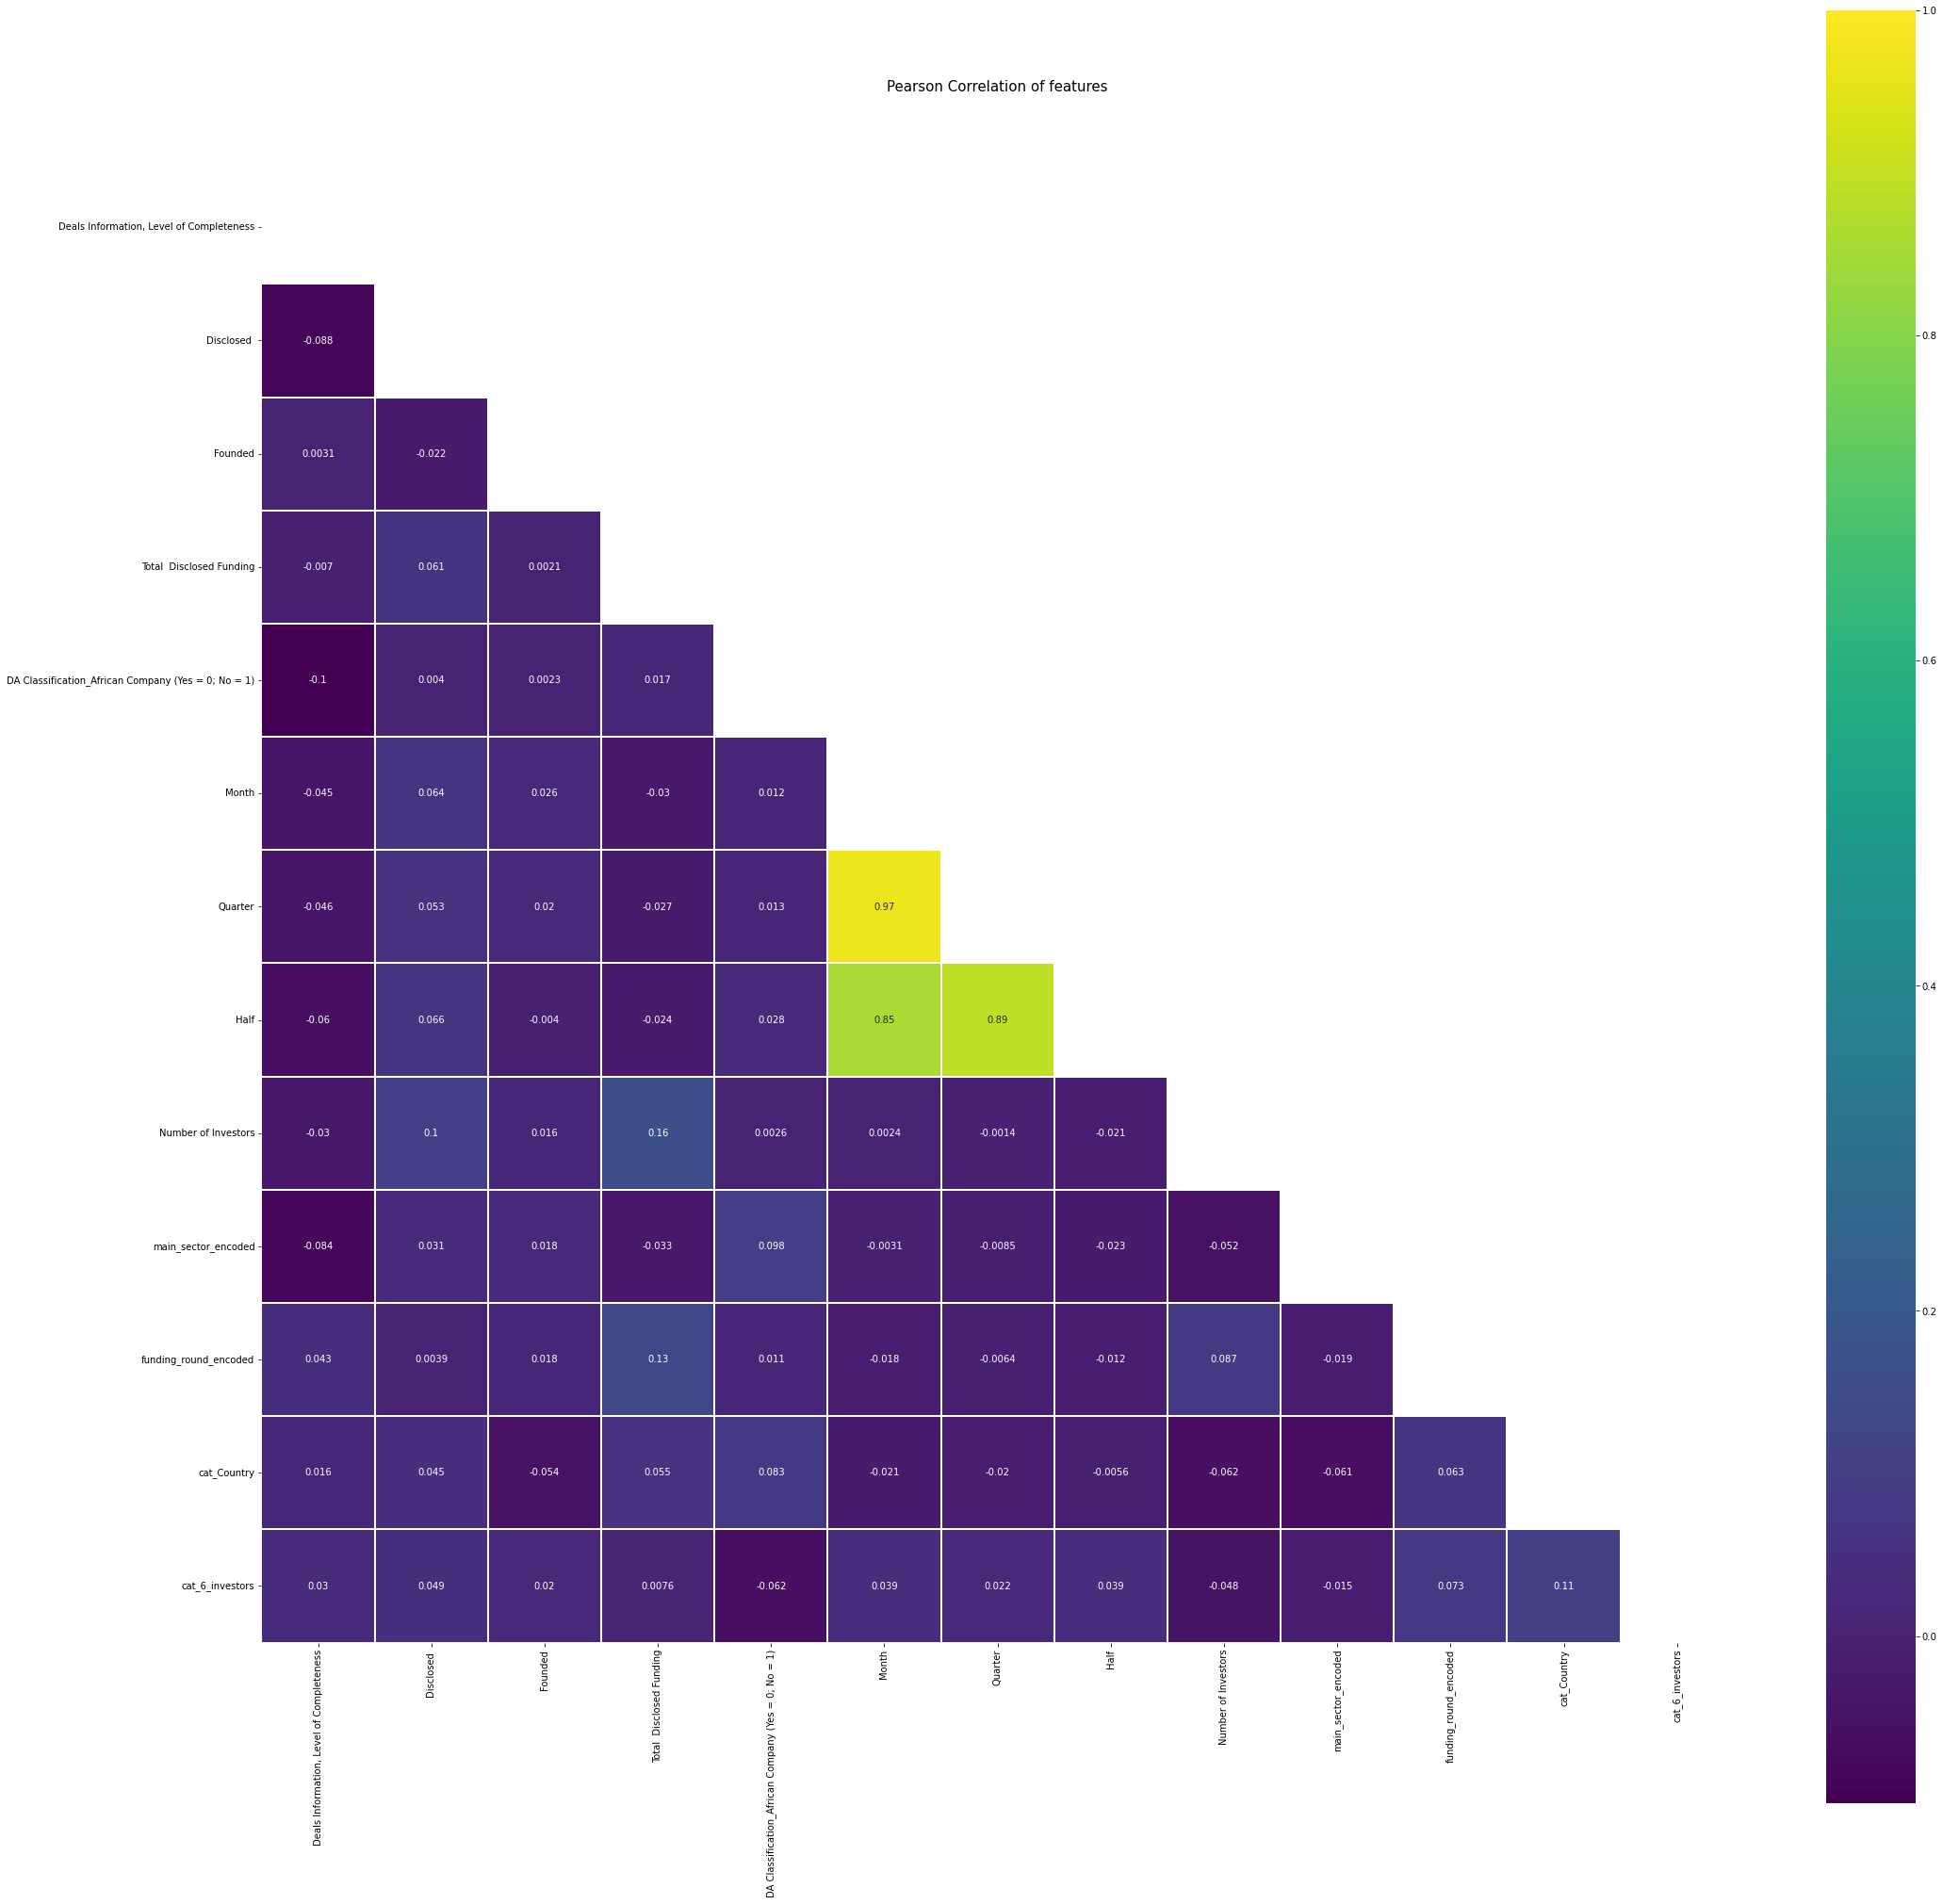

In [55]:
#creating correlation matrix
colormap = plt.cm.viridis
plt.figure(figsize = (35, 35))
plt.title('Pearson Correlation of features', y = 1.05, size = 15)
matrix = np.triu(data1.corr())
sns.heatmap(data1.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square =True, cmap=colormap, linecolor = 'white', annot=True, mask = matrix)


In [67]:
Y = data1.cat_6_investors #setting Y variable
X = data1.drop('cat_6_investors', axis = 1) #dropping status and setting features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)#test and train dataset

In [68]:
#checking size of each dataset
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (773, 12)
Shape of X_test=> (194, 12)
Shape of Y_train=> (773,)
Shape of Y_test=> (194,)


In [70]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [73]:
from sklearn.svm import SVC

In [74]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)

/home/nicholas/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

#### Confusion Matrix and Accuracy Score

In [76]:
# from sklearn import preprocessing
# encoder = preprocessing.LabelEncoder()

In [77]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.17333891914537075 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.0001 



NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [56]:

# Seperating Predictors and Outcome values from train and test sets
# X_train = pd.DataFrame(data.drop(['6_investors'],axis=1))
# Y_train_label = data['6_investors'].values.astype(object)
# X_test = pd.DataFrame(data.drop(['6_investors'],axis=1))
# Y_test_label = data['6_investors'].values.astype(object)

# Define the neural network architecture
# model = Sequential()
# model.add(Dense(64, input_dim=10, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(len(investor_names), activation='softmax'))


# Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

# Generate predictions for a new startup
# new_startup = np.array([[1000000, 0, 1, 0, 0, 0, 1, 0, 0, 0]])
# predictions = model.predict(new_startup)

# Map the numeric output to investor names
# investor_probs = {name: prob for name, prob in zip(investor_names, predictions[0])}
# top_investors = sorted(investor_probs, key=investor_probs.get, reverse=True)[:15]



In [69]:
# Dimension of Train and Test set 
# print("Dimension of Train set",X_train.shape)
# print("Dimension of Test set",X_test.shape,"\n")

In [58]:
# Transforming non numerical labels into numerical labels
# from sklearn import preprocessing
# encoder = preprocessing.LabelEncoder()

In [59]:
# encoding train labels 
# encoder.fit(Y_train_label)
# Y_train = encoder.transform(Y_train_label)

# encoding test labels 
# encoder.fit(Y_test_label)
# Y_test = encoder.transform(Y_test_label)

In [60]:
# def grab_col_names(dataframe, cat_th=10, car_th=20):
#     """

#         Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
#         Note: Categorical variables include categorical variables with numeric appearance.

#         Parameters
#         ------
#             dataframe: dataframe
#                     Dataframe to get variable names
#             cat_th: int, optional
#                     class threshold for numeric but categorical variables
#             car_th: int, optinal
#                     class threshold for categorical but cardinal variables

#         Returns
#         ------
#             cat_cols: list
#                     Categorical variable list
#             num_cols: list
#                     Numeric variable list
#             cat_but_car: list
#                     List of cardinal variables with categorical view

#         Examples
#         ------
#             import seaborn as sns
#             df = sns.load_dataset("iris")
#             print(grab_col_names(df))


#         Notes
#         ------
#             cat_cols + num_cols + cat_but_car = total number of variables
#             num_but_cat is inside cat_cols.
#             The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

#         """
#     # cat_cols, cat_but_car
#     cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
#     num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
#                    dataframe[col].dtypes != "O"]
#     cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
#                    dataframe[col].dtypes == "O"]
#     cat_cols = cat_cols + num_but_cat
#     cat_cols = [col for col in cat_cols if col not in cat_but_car]

#     # num_cols
#     num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
#     num_cols = [col for col in num_cols if col not in num_but_cat]

#     print(f"observations: {dataframe.shape[0]}")
#     print(f"variables: {dataframe.shape[1]}")
#     print(f'cat_cols: {len(cat_cols)}')
#     print(f'num_cols: {len(num_cols)}')
#     print(f'cat_but_car: {len(cat_but_car)}')
#     print(f'num_but_cat: {len(num_but_cat)}')
#     return cat_cols, num_cols, cat_but_car

# cat_cols, num_cols, cat_but_car = grab_col_names(X_train)

In [61]:
# cat_cols
# cat_but_car

In [62]:
# def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
#     dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
#     return dataframe

# X_train = one_hot_encoder(X_train, cat_but_car, drop_first=True)

In [63]:
#Total Number of Continous and Categorical features in the training set
# num_cols = X_train._get_numeric_data().columns
# print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))

In [64]:
# names_of_predictors = list(X_train.columns.values)

In [65]:
# names_of_predictors

In [66]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'Undisclosed'

##### Hyperparameter tuning using grid search and cross validation

In [ ]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#### Training SVM model using radial kernel

In [ ]:
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

In [ ]:
Y_train

In [ ]:
# Y_train.head()

# x = np.asfarray(Y_train)
X_train

In [ ]:
Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)